In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time
import warnings
warnings.filterwarnings('ignore')

# 1. 지하철 승하차 인원

In [249]:
# 수집데이터 불러오기(지하철 승하차 인원)
subway_2017_list = pd.read_csv('E:/Git/data/Academy_Second_Project/passenger_data(2016-2020)/서울교통공사 2017년 일별 역별 시간대별 승하차인원(1_8호선).csv', encoding = 'utf-8')
subway_2018_list = pd.read_csv('E:/Git/data/Academy_Second_Project/passenger_data(2016-2020)/서울교통공사 2018년 일별 역별 시간대별 승하차인원(1_8호선).csv', encoding = 'utf-8')
subway_2019_list = pd.read_csv('E:/Git/data/Academy_Second_Project/passenger_data(2016-2020)/서울교통공사 2019년 일별 역별 시간대별 승하차인원(1_8호선).csv', encoding = 'utf-8')
subway_2020_list = pd.read_csv('E:/Git/data/Academy_Second_Project/passenger_data(2016-2020)/서울교통공사 2020년 일별 역별 시간대별 승하차인원(1_8호선).csv', encoding = 'cp949')


In [250]:
print(subway_2017_list.shape)
print(subway_2018_list.shape)
print(subway_2019_list.shape)
print(subway_2020_list.shape)

(200751, 27)
(200751, 26)
(200805, 26)
(202280, 25)


In [251]:
print(subway_2017_list.columns)
print(subway_2018_list.columns)
print(subway_2019_list.columns)
print(subway_2020_list.columns)

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', '(단위:명)'],
      dtype='object')
Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', '(단위:명)'],
      dtype='object')
Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unname

In [252]:
subway_2017_list.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,(단위:명)
0,날짜,구분,호선,역번호,역명,구분,05~06,06~07,07~08,08~09,...,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00 ~ 01,합 계
1,2017-01-01,신정,1,150,서울역,승차,470,286,397,786,...,"3,610","3,858","3,376","3,384","2,537","3,914","2,660",917,112,"43,267"
2,2017-01-01,신정,1,150,서울역,하차,278,880,859,964,...,"2,743","3,074","2,492","2,120","1,798","1,618",962,551,179,"32,931"
3,2017-01-01,신정,1,151,시청,승차,204,105,112,162,...,921,955,"1,043",885,805,730,556,188,5,"10,443"
4,2017-01-01,신정,1,151,시청,하차,73,203,314,483,...,523,483,392,287,257,189,157,122,32,"8,296"


In [253]:
# subway_2017_list Column명 수정
subway_2017_list = subway_2017_list.rename(columns = subway_2017_list.iloc[0])
subway_2017_list = subway_2017_list.drop(index = 0)
subway_2017_list.head(5)

,날짜,구분,호선,역번호,역명,구분,05~06,06~07,07~08,08~09,...,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00 ~ 01,합 계
1,2017-01-01,신정,1,150,서울역,승차,470,286,397,786,...,"3,610","3,858","3,376","3,384","2,537","3,914","2,660",917,112,"43,267"
2,2017-01-01,신정,1,150,서울역,하차,278,880,859,964,...,"2,743","3,074","2,492","2,120","1,798","1,618",962,551,179,"32,931"
3,2017-01-01,신정,1,151,시청,승차,204,105,112,162,...,921,955,"1,043",885,805,730,556,188,5,"10,443"
4,2017-01-01,신정,1,151,시청,하차,73,203,314,483,...,523,483,392,287,257,189,157,122,32,"8,296"
5,2017-01-01,신정,1,152,종각,승차,791,390,245,270,...,"1,857","2,032","1,982","1,796","1,688","1,724","1,349",523,20,"20,980"


In [254]:
# Column명 확인
print(subway_2017_list.shape)
print(subway_2017_list.columns)
print(subway_2020_list.shape)
print(subway_2020_list.columns)

(200750, 27)
Index(['날짜', '구분', '호선', '역번호', '역명', '구분', '05~06', '06~07', '07~08', '08~09',
       '09~10', '10~11', '11~12', '12~13', '13~14', '14~15', '15~16', '16~17',
       '17~18', '18~19', '19~20', '20~21', '21~22', '22~23', '23~24',
       '00 ~ 01', '합 계'],
      dtype='object')
(202280, 25)
Index(['날짜', '호선', '역번호', '역명', '구분', '06:00 이전', '06:00 ~ 07:00',
       '07:00 ~ 08:00', '08:00 ~ 09:00', '09:00 ~ 10:00', '10:00 ~ 11:00',
       '11:00 ~ 12:00', '12:00 ~ 13:00', '13:00 ~ 14:00', '14:00 ~ 15:00',
       '15:00 ~ 16:00', '16:00 ~ 17:00', '17:00 ~ 18:00', '18:00 ~ 19:00',
       '19:00 ~ 20:00', '20:00 ~ 21:00', '21:00 ~ 22:00', '22:00 ~ 23:00',
       '23:00 ~ 24:00', '24:00 이후'],
      dtype='object')


In [255]:
# subway_2020_list의 컬럼 형태와 동일하게 수정
subway_2017_list.columns = ['날짜', 'del1', '호선', '역번호', '역명', '구분', '06:00 이전', '06:00 ~ 07:00',
       '07:00 ~ 08:00', '08:00 ~ 09:00', '09:00 ~ 10:00', '10:00 ~ 11:00',
       '11:00 ~ 12:00', '12:00 ~ 13:00', '13:00 ~ 14:00', '14:00 ~ 15:00',
       '15:00 ~ 16:00', '16:00 ~ 17:00', '17:00 ~ 18:00', '18:00 ~ 19:00',
       '19:00 ~ 20:00', '20:00 ~ 21:00', '21:00 ~ 22:00', '22:00 ~ 23:00',
       '23:00 ~ 24:00', '24:00 이후', 'del2']
print(subway_2017_list.columns)
subway_2017_list = subway_2017_list.drop( ['del1', 'del2'], axis = 1 )
print(subway_2017_list.shape)
print(subway_2017_list.columns)

Index(['날짜', 'del1', '호선', '역번호', '역명', '구분', '06:00 이전', '06:00 ~ 07:00',
       '07:00 ~ 08:00', '08:00 ~ 09:00', '09:00 ~ 10:00', '10:00 ~ 11:00',
       '11:00 ~ 12:00', '12:00 ~ 13:00', '13:00 ~ 14:00', '14:00 ~ 15:00',
       '15:00 ~ 16:00', '16:00 ~ 17:00', '17:00 ~ 18:00', '18:00 ~ 19:00',
       '19:00 ~ 20:00', '20:00 ~ 21:00', '21:00 ~ 22:00', '22:00 ~ 23:00',
       '23:00 ~ 24:00', '24:00 이후', 'del2'],
      dtype='object')
(200750, 25)
Index(['날짜', '호선', '역번호', '역명', '구분', '06:00 이전', '06:00 ~ 07:00',
       '07:00 ~ 08:00', '08:00 ~ 09:00', '09:00 ~ 10:00', '10:00 ~ 11:00',
       '11:00 ~ 12:00', '12:00 ~ 13:00', '13:00 ~ 14:00', '14:00 ~ 15:00',
       '15:00 ~ 16:00', '16:00 ~ 17:00', '17:00 ~ 18:00', '18:00 ~ 19:00',
       '19:00 ~ 20:00', '20:00 ~ 21:00', '21:00 ~ 22:00', '22:00 ~ 23:00',
       '23:00 ~ 24:00', '24:00 이후'],
      dtype='object')


In [256]:
# Column명 확인
print(subway_2018_list.shape)
print(subway_2018_list.columns)

(200751, 26)
Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', '(단위:명)'],
      dtype='object')


In [257]:
# subway_2018_list Column명 수정
subway_2018_list = subway_2018_list.rename(columns = subway_2018_list.iloc[0])
subway_2018_list = subway_2018_list.drop(index = 0)
subway_2018_list.head(5)

,날짜,호선,역번호,역명,구분,05 ~ 06,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,...,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,00 ~ 01,합 계
1,2018-01-01,1호선,150,서울역,승차,373,318,365,785,1047,...,3476,3891,3227,2945,2382,3070,1750,781,96,40393
2,2018-01-01,1호선,150,서울역,하차,205,1040,872,984,1650,...,2885,2845,2337,2131,1669,1404,868,477,147,34730
3,2018-01-01,1호선,151,시청,승차,87,105,124,197,291,...,1027,1102,1278,1163,1032,975,553,214,9,12298
4,2018-01-01,1호선,151,시청,하차,47,294,497,1017,673,...,781,702,552,388,308,236,160,100,39,10945
5,2018-01-01,1호선,152,종각,승차,604,399,191,250,370,...,2127,2172,2171,1873,1935,2084,1458,580,28,22621


In [258]:
# subway_2020_list의 컬럼 형태와 동일하게 수정
subway_2018_list.columns = ['날짜', '호선', '역번호', '역명', '구분', '06:00 이전', '06:00 ~ 07:00',
       '07:00 ~ 08:00', '08:00 ~ 09:00', '09:00 ~ 10:00', '10:00 ~ 11:00',
       '11:00 ~ 12:00', '12:00 ~ 13:00', '13:00 ~ 14:00', '14:00 ~ 15:00',
       '15:00 ~ 16:00', '16:00 ~ 17:00', '17:00 ~ 18:00', '18:00 ~ 19:00',
       '19:00 ~ 20:00', '20:00 ~ 21:00', '21:00 ~ 22:00', '22:00 ~ 23:00',
       '23:00 ~ 24:00', '24:00 이후', 'del']
print(subway_2018_list.columns)
subway_2018_list = subway_2018_list.drop( ['del'], axis = 1 )
print(subway_2018_list.shape)
print(subway_2018_list.columns)

Index(['날짜', '호선', '역번호', '역명', '구분', '06:00 이전', '06:00 ~ 07:00',
       '07:00 ~ 08:00', '08:00 ~ 09:00', '09:00 ~ 10:00', '10:00 ~ 11:00',
       '11:00 ~ 12:00', '12:00 ~ 13:00', '13:00 ~ 14:00', '14:00 ~ 15:00',
       '15:00 ~ 16:00', '16:00 ~ 17:00', '17:00 ~ 18:00', '18:00 ~ 19:00',
       '19:00 ~ 20:00', '20:00 ~ 21:00', '21:00 ~ 22:00', '22:00 ~ 23:00',
       '23:00 ~ 24:00', '24:00 이후', 'del'],
      dtype='object')
(200750, 25)
Index(['날짜', '호선', '역번호', '역명', '구분', '06:00 이전', '06:00 ~ 07:00',
       '07:00 ~ 08:00', '08:00 ~ 09:00', '09:00 ~ 10:00', '10:00 ~ 11:00',
       '11:00 ~ 12:00', '12:00 ~ 13:00', '13:00 ~ 14:00', '14:00 ~ 15:00',
       '15:00 ~ 16:00', '16:00 ~ 17:00', '17:00 ~ 18:00', '18:00 ~ 19:00',
       '19:00 ~ 20:00', '20:00 ~ 21:00', '21:00 ~ 22:00', '22:00 ~ 23:00',
       '23:00 ~ 24:00', '24:00 이후'],
      dtype='object')


In [259]:
# Column명 확인
print(subway_2019_list.shape)
print(subway_2019_list.columns)

(200805, 26)
Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', '(단위:명)'],
      dtype='object')


In [260]:
# subway_2019_list Column명 수정
subway_2019_list = subway_2019_list.rename(columns = subway_2019_list.iloc[0])
subway_2019_list = subway_2019_list.drop(index = 0)
subway_2019_list.head(5)

,날짜,호선,역번호,역명,구분,06시 이전,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,...,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,24시 이후,합 계
1,2019-01-01,1호선,150,서울역,승차,348,321,348,741,940,...,3226,3447,3277,2898,2590,3004,2234,970,38,39559
2,2019-01-01,1호선,150,서울역,하차,222,821,808,961,1472,...,2491,2572,2060,1991,1683,1217,764,456,149,31279
3,2019-01-01,1호선,151,시청,승차,87,98,143,206,280,...,958,1062,1146,1119,992,904,570,211,6,11836
4,2019-01-01,1호선,151,시청,하차,48,237,323,571,577,...,733,746,606,374,311,268,177,144,57,10359
5,2019-01-01,1호선,152,종각,승차,669,318,217,203,333,...,1870,2129,2024,1806,1796,1780,1296,497,31,21042


In [261]:
# subway_2020_list의 컬럼 형태와 동일하게 수정
subway_2019_list.columns = ['날짜', '호선', '역번호', '역명', '구분', '06:00 이전', '06:00 ~ 07:00',
       '07:00 ~ 08:00', '08:00 ~ 09:00', '09:00 ~ 10:00', '10:00 ~ 11:00',
       '11:00 ~ 12:00', '12:00 ~ 13:00', '13:00 ~ 14:00', '14:00 ~ 15:00',
       '15:00 ~ 16:00', '16:00 ~ 17:00', '17:00 ~ 18:00', '18:00 ~ 19:00',
       '19:00 ~ 20:00', '20:00 ~ 21:00', '21:00 ~ 22:00', '22:00 ~ 23:00',
       '23:00 ~ 24:00', '24:00 이후', 'del']
print(subway_2019_list.columns)
subway_2019_list = subway_2019_list.drop( ['del'], axis = 1 )
print(subway_2019_list.shape)
print(subway_2019_list.columns)

Index(['날짜', '호선', '역번호', '역명', '구분', '06:00 이전', '06:00 ~ 07:00',
       '07:00 ~ 08:00', '08:00 ~ 09:00', '09:00 ~ 10:00', '10:00 ~ 11:00',
       '11:00 ~ 12:00', '12:00 ~ 13:00', '13:00 ~ 14:00', '14:00 ~ 15:00',
       '15:00 ~ 16:00', '16:00 ~ 17:00', '17:00 ~ 18:00', '18:00 ~ 19:00',
       '19:00 ~ 20:00', '20:00 ~ 21:00', '21:00 ~ 22:00', '22:00 ~ 23:00',
       '23:00 ~ 24:00', '24:00 이후', 'del'],
      dtype='object')
(200804, 25)
Index(['날짜', '호선', '역번호', '역명', '구분', '06:00 이전', '06:00 ~ 07:00',
       '07:00 ~ 08:00', '08:00 ~ 09:00', '09:00 ~ 10:00', '10:00 ~ 11:00',
       '11:00 ~ 12:00', '12:00 ~ 13:00', '13:00 ~ 14:00', '14:00 ~ 15:00',
       '15:00 ~ 16:00', '16:00 ~ 17:00', '17:00 ~ 18:00', '18:00 ~ 19:00',
       '19:00 ~ 20:00', '20:00 ~ 21:00', '21:00 ~ 22:00', '22:00 ~ 23:00',
       '23:00 ~ 24:00', '24:00 이후'],
      dtype='object')


In [263]:
# 2017 ~ 2020 지하철 승차인원 데이터 합산
subway_total = subway_2017_list
subway_total = subway_total.append(subway_2018_list)
subway_total = subway_total.append(subway_2019_list)
subway_total = subway_total.append(subway_2020_list)

subway_total.head(5)

,날짜,호선,역번호,역명,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,...,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 ~ 24:00,24:00 이후
1,2017-01-01,1,150,서울역,승차,470,286,397,786,"1,421",...,"3,178","3,610","3,858","3,376","3,384","2,537","3,914","2,660",917,112
2,2017-01-01,1,150,서울역,하차,278,880,859,964,"1,407",...,"2,682","2,743","3,074","2,492","2,120","1,798","1,618",962,551,179
3,2017-01-01,1,151,시청,승차,204,105,112,162,288,...,727,921,955,"1,043",885,805,730,556,188,5
4,2017-01-01,1,151,시청,하차,73,203,314,483,669,...,629,523,483,392,287,257,189,157,122,32
5,2017-01-01,1,152,종각,승차,791,390,245,270,323,...,"1,533","1,857","2,032","1,982","1,796","1,688","1,724","1,349",523,20


In [269]:
subway_total_list = subway_total

In [270]:
subway_total_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804584 entries, 1 to 202279
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   날짜             804584 non-null  object
 1   호선             804584 non-null  object
 2   역번호            804584 non-null  object
 3   역명             804584 non-null  object
 4   구분             804584 non-null  object
 5   06:00 이전       804584 non-null  object
 6   06:00 ~ 07:00  804584 non-null  object
 7   07:00 ~ 08:00  804584 non-null  object
 8   08:00 ~ 09:00  804584 non-null  object
 9   09:00 ~ 10:00  804584 non-null  object
 10  10:00 ~ 11:00  804584 non-null  object
 11  11:00 ~ 12:00  804584 non-null  object
 12  12:00 ~ 13:00  804584 non-null  object
 13  13:00 ~ 14:00  804584 non-null  object
 14  14:00 ~ 15:00  804584 non-null  object
 15  15:00 ~ 16:00  804584 non-null  object
 16  16:00 ~ 17:00  804584 non-null  object
 17  17:00 ~ 18:00  804584 non-null  object
 18  18:0

In [272]:
# 2호선 / 승차인원 (2호선 데이터만 선택)
subway_total_edit1 = subway_total_list[(subway_total_list['호선'] == '2호선') & (subway_total_list['구분'] == '승차')]

# 1차 가공 데이터 (2호선/승차인원)
subway_total_edit1.head(3)

,날짜,호선,역번호,역명,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,...,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 ~ 24:00,24:00 이후
21,2018-01-01,2호선,201,시청,승차,37,57,77,106,179,...,610,698,798,765,630,633,617,392,176,2
23,2018-01-01,2호선,202,을지로입구,승차,128,116,127,205,373,...,1722,1798,2139,2478,2001,1862,2196,1804,863,13
25,2018-01-01,2호선,203,을지로3가,승차,42,79,98,124,215,...,528,545,619,539,427,367,342,237,98,0


In [273]:
# 2차 가공데이터 (시간별 승차인원 데이터로 형태 변경)
subway_total_edit2 = pd.DataFrame()

# 시간별 승차인원 데이터
for i in range(len(subway_total_edit1)) :
  a = subway_total_edit1.iloc[i]
  a = pd.DataFrame(a)
  a = a.transpose()
  b = pd.melt(a, id_vars=['날짜','호선','역명','역번호','구분'])
  subway_total_edit2 = subway_total_edit2.append(b)

subway_total_edit2.head()

,날짜,호선,역명,역번호,구분,variable,value
0,2018-01-01,2호선,시청,201,승차,06:00 이전,37
1,2018-01-01,2호선,시청,201,승차,06:00 ~ 07:00,57
2,2018-01-01,2호선,시청,201,승차,07:00 ~ 08:00,77
3,2018-01-01,2호선,시청,201,승차,08:00 ~ 09:00,106
4,2018-01-01,2호선,시청,201,승차,09:00 ~ 10:00,179


In [275]:
subway_total_edit2

,날짜,호선,역명,역번호,구분,variable,value
0,2018-01-01,2호선,시청,201,승차,06:00 이전,37
1,2018-01-01,2호선,시청,201,승차,06:00 ~ 07:00,57
2,2018-01-01,2호선,시청,201,승차,07:00 ~ 08:00,77
3,2018-01-01,2호선,시청,201,승차,08:00 ~ 09:00,106
4,2018-01-01,2호선,시청,201,승차,09:00 ~ 10:00,179
...,...,...,...,...,...,...,...
15,2020-12-31,2호선,용두(동대문구청),250,승차,20:00 ~ 21:00,43
16,2020-12-31,2호선,용두(동대문구청),250,승차,21:00 ~ 22:00,33
17,2020-12-31,2호선,용두(동대문구청),250,승차,22:00 ~ 23:00,13
18,2020-12-31,2호선,용두(동대문구청),250,승차,23:00 ~ 24:00,3


In [3]:
# 2차 가공 데이터 확인
print(subway_total_edit2.shape)
print("--------------------------------------")
subway_total_edit2.info()

(1096000, 7)
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096000 entries, 0 to 1095999
Data columns (total 7 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   날짜        1096000 non-null  object
 1   호선        1096000 non-null  object
 2   역명        1096000 non-null  object
 3   역번호       1096000 non-null  int64 
 4   구분        1096000 non-null  object
 5   variable  1096000 non-null  object
 6   value     1096000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 58.5+ MB


In [4]:
subway_total_edit2['역명'].value_counts()

시청                     21920
신정네거리                  21920
을지로입구                  21920
서울대입구(관악구청)            21920
봉천                     21920
신림                     21920
신대방                    21920
구로디지털단지                21920
대림(구로구청)               21920
신도림                    21920
문래                     21920
영등포구청                  21920
당산                     21920
합정                     21920
홍대입구                   21920
신촌                     21920
이대                     21920
아현                     21920
충정로(경기대입구)             21920
용답                     21920
신답                     21920
신설동                    21920
도림천                    21920
사당                     21920
방배                     21920
서초                     21920
건대입구                   21920
을지로3가                  21920
을지로4가                  21920
용두(동대문구청)              21920
신당                     21920
상왕십리                   21920
왕십리(성동구청)              21920
한양대                    21920
뚝섬            

In [6]:
# 3차 가공 데이터 (같은 역이지만 다른 이름으로 표기된 케이스 수정)
subway_total_edit3 = subway_total_edit2
subway_total_edit3 = subway_total_edit3.replace('동대문역사문화공원(DDP)(DDP)', '동대문역사문화공원(DDP)')
subway_total_edit3 = subway_total_edit3.replace('동대문역사문화공원', '동대문역사문화공원(DDP)')
subway_total_edit3 = subway_total_edit3.replace('낙성대(강감찬)', '낙성대')

subway_total_edit3['역명'].value_counts()

시청                21920
합정                21920
서울대입구(관악구청)       21920
봉천                21920
신림                21920
신대방               21920
구로디지털단지           21920
대림(구로구청)          21920
신도림               21920
문래                21920
영등포구청             21920
당산                21920
홍대입구              21920
을지로입구             21920
신촌                21920
이대                21920
아현                21920
충정로(경기대입구)        21920
용답                21920
신답                21920
신설동               21920
도림천               21920
양천구청              21920
신정네거리             21920
낙성대               21920
사당                21920
방배                21920
서초                21920
을지로3가             21920
을지로4가             21920
동대문역사문화공원(DDP)    21920
신당                21920
상왕십리              21920
왕십리(성동구청)         21920
한양대               21920
뚝섬                21920
성수                21920
건대입구              21920
구의(광진구청)          21920
강변(동서울터미널)        21920
잠실나루              21920
잠실(송파구청)        

In [7]:
# 각 지하철열 위치 정보 (수집데이터 기준 : 일시(날짜+시간), 위치)
sub_location = {'까치산':'강서구','신정네거리':'양천구','양천구청':'양천구',
                '도림천':'구로구','신도림':'구로구','구로디지털단지':'동작구',
                '대림':'구로구','대림(구로구청)':'구로구','문래':'영등포구','영등포구청':'영등포구',
                '당산':'영등포구','합정':'마포구','홍대입구':'마포구',
                '이대':'마포구','아현':'마포구','신촌':'서대문구',
                '충정로':'서대문구','충정로(경기대입구)':'서대문구','시청':'중구','을지로입구':'중구',
                '을지로3가':'중구','을지로4가':'중구','동대문역사문화공원':'중구','동대문역사문화공원(DDP)':'중구',
                '신당':'중구','상왕십리':'성동구','왕십리':'성동구','왕십리(성동구청)':'성동구',
                '한양대':'성동구','뚝섬':'성동구','성수':'성동구','성수지선':'성동구',
                '용답':'성동구','신답':'성동구','용두':'동대문구','용두(동대문구청)':'동대문구',
                '신설동':'동대문구','건대입구':'광진구','구의':'광진구','구의(광진구청)':'광진구',
                '강변':'광진구','강변(동서울터미널)':'광진구','잠실나루':'송파구','잠실':'송파구','잠실(송파구청)':'송파구',
                '잠실새내':'송파구','종합운동장':'송파구','삼성':'강남구','삼성(무역센터)':'강남구',
                '선릉':'강남구','역삼':'강남구','강남':'강남구',
                '교대':'서초구','교대(법원.검찰청)':'서초구','방배':'서초구','서초':'서초구','사당':'관악구2',
                '낙성대':'관악구1','서울대입구':'관악구1','서울대입구(관악구청)':'관악구1','봉천':'관악구1',
                '신림':'동작구','신대방':'동작구'}

In [9]:
# 3차 가공 데이터에 위치 정보 생성
location = []
for i in subway_total_edit3['역명'] :
  location.append(sub_location[i])
subway_total_edit3['Location'] = location

In [10]:
subway_total_edit3['variable'].value_counts()

06:00 이전         54800
06:00 ~ 07:00    54800
23:00 ~ 24:00    54800
22:00 ~ 23:00    54800
21:00 ~ 22:00    54800
20:00 ~ 21:00    54800
19:00 ~ 20:00    54800
18:00 ~ 19:00    54800
17:00 ~ 18:00    54800
16:00 ~ 17:00    54800
15:00 ~ 16:00    54800
14:00 ~ 15:00    54800
13:00 ~ 14:00    54800
12:00 ~ 13:00    54800
11:00 ~ 12:00    54800
10:00 ~ 11:00    54800
09:00 ~ 10:00    54800
08:00 ~ 09:00    54800
07:00 ~ 08:00    54800
24:00 이후         54800
Name: variable, dtype: int64

In [11]:
# 3차 가공 데이터 (시간 수정)
subway_total_edit3 = subway_total_edit3.replace('06:00 이전', '06:00')
subway_total_edit3 = subway_total_edit3.replace('06:00 ~ 07:00', '07:00')
subway_total_edit3 = subway_total_edit3.replace('07:00 ~ 08:00', '08:00')
subway_total_edit3 = subway_total_edit3.replace('08:00 ~ 09:00', '09:00')
subway_total_edit3 = subway_total_edit3.replace('09:00 ~ 10:00', '10:00')
subway_total_edit3 = subway_total_edit3.replace('10:00 ~ 11:00', '11:00')
subway_total_edit3 = subway_total_edit3.replace('11:00 ~ 12:00', '12:00')
subway_total_edit3 = subway_total_edit3.replace('12:00 ~ 13:00', '13:00')
subway_total_edit3 = subway_total_edit3.replace('13:00 ~ 14:00', '14:00')
subway_total_edit3 = subway_total_edit3.replace('14:00 ~ 15:00', '15:00')
subway_total_edit3 = subway_total_edit3.replace('15:00 ~ 16:00', '16:00')
subway_total_edit3 = subway_total_edit3.replace('16:00 ~ 17:00', '17:00')
subway_total_edit3 = subway_total_edit3.replace('17:00 ~ 18:00', '18:00')
subway_total_edit3 = subway_total_edit3.replace('18:00 ~ 19:00', '19:00')
subway_total_edit3 = subway_total_edit3.replace('19:00 ~ 20:00', '20:00')
subway_total_edit3 = subway_total_edit3.replace('20:00 ~ 21:00', '21:00')
subway_total_edit3 = subway_total_edit3.replace('21:00 ~ 22:00', '22:00')
subway_total_edit3 = subway_total_edit3.replace('22:00 ~ 23:00', '23:00')
subway_total_edit3 = subway_total_edit3.replace('23:00 ~ 24:00', '00:00') # 기상데이터와 시간을 맞추기 위해 '00:00'으로 설정
subway_total_edit3 = subway_total_edit3.replace('24:00 이후', '01:00')

subway_total_edit3['variable'].value_counts()

06:00    54800
07:00    54800
00:00    54800
23:00    54800
22:00    54800
21:00    54800
20:00    54800
19:00    54800
18:00    54800
17:00    54800
16:00    54800
15:00    54800
14:00    54800
13:00    54800
12:00    54800
11:00    54800
10:00    54800
09:00    54800
08:00    54800
01:00    54800
Name: variable, dtype: int64

In [12]:
# 3차 가공 데이터 확인
subway_total_edit3

,날짜,호선,역명,역번호,구분,variable,value,Location
0,2018-01-01,2호선,시청,201,승차,06:00,37,중구
1,2018-01-01,2호선,시청,201,승차,07:00,57,중구
2,2018-01-01,2호선,시청,201,승차,08:00,77,중구
3,2018-01-01,2호선,시청,201,승차,09:00,106,중구
4,2018-01-01,2호선,시청,201,승차,10:00,179,중구
...,...,...,...,...,...,...,...,...
1095995,2020-12-31,2호선,용두(동대문구청),250,승차,21:00,43,동대문구
1095996,2020-12-31,2호선,용두(동대문구청),250,승차,22:00,33,동대문구
1095997,2020-12-31,2호선,용두(동대문구청),250,승차,23:00,13,동대문구
1095998,2020-12-31,2호선,용두(동대문구청),250,승차,00:00,3,동대문구


In [13]:
# 4차 가공 데이터 (Column 편집)
subway_total_edit4 = subway_total_edit3[['날짜','variable','호선','Location','역명','value']]
subway_total_edit4 = subway_total_edit4.rename(columns = {'날짜' : 'Date',
                                                  'variable' : 'Time', 
                                                  '호선' : 'Line', 
                                                  '역명' : 'Sub_station', 
                                                  'value' : 'Passenger_num'})
subway_total_edit4 = subway_total_edit4.reset_index(drop=True)

subway_total_edit4.head(2)

,Date,Time,Line,Location,Sub_station,Passenger_num
0,2018-01-01,06:00,2호선,중구,시청,37
1,2018-01-01,07:00,2호선,중구,시청,57


In [14]:
# 4차 가공 데이터 확인
subway_total_edit4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096000 entries, 0 to 1095999
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Date           1096000 non-null  object
 1   Time           1096000 non-null  object
 2   Line           1096000 non-null  object
 3   Location       1096000 non-null  object
 4   Sub_station    1096000 non-null  object
 5   Passenger_num  1096000 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 50.2+ MB


In [ ]:
# # 5차 가공 데이터
# sub_2020_edit5 = sub_2020_edit4

# # 첫 행 시간 데이터 변경
# sub_2020_edit5['Time'][0] = sub_2020_edit5['Time'][0].replace(sub_2020_edit5['Time'][0], '05:00')

# for i in range(len(sub_2020_edit5['Time'])) :
#   if i == 0 : # 첫 행 건너뛰기
#     continue
#   elif i%20 == 0 :
#     sub_2020_edit5['Time'][i] = sub_2020_edit5['Time'][i].replace(sub_2020_edit5['Time'][i], '05:00')
#   elif sub_2020_edit5['Time'][i] == '24:00 이후' :
#     sub_2020_edit5['Time'][i] = sub_2020_edit5['Time'][i].replace(sub_2020_edit5['Time'][i], '00:00')
#   else :
#     sub_2020_edit5['Time'][i] = sub_2020_edit5['Time'][i].replace(sub_2020_edit5['Time'][i], sub_2020_edit5['Time'][i][0:5])

# sub_2020_edit5

In [15]:
# 5차 가공 데이터 (데이터 타입 변경 및 형태 변경)
subway_total_edit5 = subway_total_edit4
# 날짜 columns 타입 변경
subway_total_edit5['Date'] = subway_total_edit5['Date'].astype(str)
# 일시 columns 추가 (일시 : 날짜 + 시간)
subway_total_edit5['Date'] = subway_total_edit5['Date'] +' '+ subway_total_edit5['Time']

# Columns 수정
subway_total_edit5 = subway_total_edit5[['Date','Line','Location','Sub_station','Passenger_num']]
subway_total_edit5 = subway_total_edit5.reset_index(drop=True)

# 일시 columns 타입 변경
subway_total_edit5['Date'] = pd.to_datetime(subway_total_edit5['Date'])

subway_total_edit5

,Date,Line,Location,Sub_station,Passenger_num
0,2018-01-01 06:00:00,2호선,중구,시청,37
1,2018-01-01 07:00:00,2호선,중구,시청,57
2,2018-01-01 08:00:00,2호선,중구,시청,77
3,2018-01-01 09:00:00,2호선,중구,시청,106
4,2018-01-01 10:00:00,2호선,중구,시청,179
...,...,...,...,...,...
1095995,2020-12-31 21:00:00,2호선,동대문구,용두(동대문구청),43
1095996,2020-12-31 22:00:00,2호선,동대문구,용두(동대문구청),33
1095997,2020-12-31 23:00:00,2호선,동대문구,용두(동대문구청),13
1095998,2020-12-31 00:00:00,2호선,동대문구,용두(동대문구청),3


In [16]:
# 5차 가공 데이터 확인
subway_total_edit5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096000 entries, 0 to 1095999
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Date           1096000 non-null  datetime64[ns]
 1   Line           1096000 non-null  object        
 2   Location       1096000 non-null  object        
 3   Sub_station    1096000 non-null  object        
 4   Passenger_num  1096000 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 41.8+ MB


In [17]:
# csv 파일 저장
subway_total_edit5.to_csv('E:/Git/SourceTree/Academy_Second_Project/temp_file.csv', index=False)

# csv 파일 불러오기
temp_file = pd.read_csv('E:/Git/SourceTree/Academy_Second_Project/temp_file.csv')

temp_file

,Date,Line,Location,Sub_station,Passenger_num
0,2018-01-01 06:00:00,2호선,중구,시청,37
1,2018-01-01 07:00:00,2호선,중구,시청,57
2,2018-01-01 08:00:00,2호선,중구,시청,77
3,2018-01-01 09:00:00,2호선,중구,시청,106
4,2018-01-01 10:00:00,2호선,중구,시청,179
...,...,...,...,...,...
1095995,2020-12-31 21:00:00,2호선,동대문구,용두(동대문구청),43
1095996,2020-12-31 22:00:00,2호선,동대문구,용두(동대문구청),33
1095997,2020-12-31 23:00:00,2호선,동대문구,용두(동대문구청),13
1095998,2020-12-31 00:00:00,2호선,동대문구,용두(동대문구청),3


# 2. 기상 데이터

In [18]:
weather_2017_list = pd.read_csv('E:/Git/data/Academy_Second_Project/weather_data(2016-2020)/OBS_AWS_TIM_2017.csv', encoding = 'cp949')
weather_2018_list = pd.read_csv('E:/Git/data/Academy_Second_Project/weather_data(2016-2020)/OBS_AWS_TIM_2018.csv', encoding = 'cp949')
weather_2019_list = pd.read_csv('E:/Git/data/Academy_Second_Project/weather_data(2016-2020)/OBS_AWS_TIM_2019.csv', encoding = 'cp949')
weather_2020_list = pd.read_csv('E:/Git/data/Academy_Second_Project/weather_data(2016-2020)/OBS_AWS_TIM_2020.csv', encoding = 'cp949')

In [21]:
print(weather_2017_list.shape)
print(weather_2018_list.shape)
print(weather_2019_list.shape)
print(weather_2020_list.shape)

(243810, 7)
(251904, 7)
(243710, 7)
(244656, 7)


In [26]:
print(weather_2017_list.columns)
print(weather_2018_list.columns)
print(weather_2019_list.columns)
print(weather_2020_list.columns)

Index(['지점', '지점명', '일시', '기온(°C)', '풍향(deg)', '풍속(m/s)', '강수량(mm)'], dtype='object')
Index(['지점', '지점명', '일시', '기온(°C)', '풍향(deg)', '풍속(m/s)', '강수량(mm)'], dtype='object')
Index(['지점', '지점명', '일시', '기온(°C)', '풍향(deg)', '풍속(m/s)', '강수량(mm)'], dtype='object')
Index(['지점', '지점명', '일시', '기온(°C)', '풍향(deg)', '풍속(m/s)', '강수량(mm)'], dtype='object')


In [30]:
# 2017 ~ 2020 지하철 승차인원 데이터 합산
weather_total = weather_2017_list
weather_total = weather_total.append(weather_2018_list)
weather_total = weather_total.append(weather_2019_list)
weather_total = weather_total.append(weather_2020_list)

weather_total

,지점,지점명,일시,기온(°C),풍향(deg),풍속(m/s),강수량(mm)
0,400,강남,2017-01-01 01:00,1.4,69.1,1.3,0.0
1,400,강남,2017-01-01 02:00,1.2,66.2,1.6,0.0
2,400,강남,2017-01-01 03:00,0.5,66.0,1.5,0.0
3,400,강남,2017-01-01 04:00,0.6,63.4,0.5,0.0
4,400,강남,2017-01-01 05:00,0.4,63.2,0.8,0.0
...,...,...,...,...,...,...,...
244651,889,현충원,2020-12-30 20:00,-10.8,281.8,3.2,0.0
244652,889,현충원,2020-12-30 21:00,-11.5,289.2,2.8,0.0
244653,889,현충원,2020-12-30 22:00,-11.6,280.8,1.7,0.0
244654,889,현충원,2020-12-30 23:00,-11.5,277.4,2.4,0.0


In [31]:
# 기상데이터 불러오기
weather_total_edit1 = weather_total

# 1차 가공 데이터 (기간)
weather_total_edit1

,지점,지점명,일시,기온(°C),풍향(deg),풍속(m/s),강수량(mm)
0,400,강남,2017-01-01 01:00,1.4,69.1,1.3,0.0
1,400,강남,2017-01-01 02:00,1.2,66.2,1.6,0.0
2,400,강남,2017-01-01 03:00,0.5,66.0,1.5,0.0
3,400,강남,2017-01-01 04:00,0.6,63.4,0.5,0.0
4,400,강남,2017-01-01 05:00,0.4,63.2,0.8,0.0
...,...,...,...,...,...,...,...
244651,889,현충원,2020-12-30 20:00,-10.8,281.8,3.2,0.0
244652,889,현충원,2020-12-30 21:00,-11.5,289.2,2.8,0.0
244653,889,현충원,2020-12-30 22:00,-11.6,280.8,1.7,0.0
244654,889,현충원,2020-12-30 23:00,-11.5,277.4,2.4,0.0


In [32]:
weather_total_edit1['지점명'].value_counts()

노원       34959
성동       34953
서초       34952
관악       34946
양천       34946
강북       34941
성북       34933
강동       34912
도봉       34907
송파       34906
기상청      34903
현충원      34902
남현       34896
서대문      34894
영등포      34892
한강       34878
구로       34853
광진       34846
동대문      34824
중구       34818
금천       34817
용산       34781
중랑       34776
강서       34770
마포       34700
강남       34656
은평       34574
관악(레)    26224
북악산      16721
Name: 지점명, dtype: int64

In [34]:
# null값 확인
print(weather_total_edit1.isnull().sum())
print('----------------------')

# 2차 가공 데이터 (nulll값 치환)
weather_total_edit2 = weather_total_edit1

# 풍향 column 사용 안함 (null값 무시)
# 강수량 null값은 0으로 대체
weather_total_edit2['강수량(mm)'] = np.where(pd.notnull(weather_total_edit2['강수량(mm)']) == True, weather_total_edit2['강수량(mm)'], 0)
# 기온과 풍속의 null값은 위/아래값으로 대체
weather_total_edit2 = weather_total_edit2.fillna(method = 'ffill')
# null값 재확인
print(weather_total_edit2.isnull().sum())

지점            0
지점명           0
일시            0
기온(°C)     2237
풍향(deg)    3762
풍속(m/s)    3309
강수량(mm)    6099
dtype: int64
----------------------
지점         0
지점명        0
일시         0
기온(°C)     0
풍향(deg)    0
풍속(m/s)    0
강수량(mm)    0
dtype: int64


In [90]:
# 2차 가공 데이터 확인
weather_2020_edit2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244656 entries, 0 to 244655
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   지점       244656 non-null  int64  
 1   지점명      244656 non-null  object 
 2   일시       244656 non-null  object 
 3   기온(°C)   244656 non-null  float64
 4   풍향(deg)  244656 non-null  float64
 5   풍속(m/s)  244656 non-null  float64
 6   강수량(mm)  244656 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 13.1+ MB


In [103]:
# 3차 가공 데이터 (columns 수정)
weather_2020_edit3 = weather_2020_edit2
weather_2020_edit3 = weather_2020_edit3[['일시','지점명','기온(°C)','풍속(m/s)','강수량(mm)']]

weather_2020_edit3['일시'] = pd.to_datetime(weather_2020_edit3['일시'])
weather_2020_edit3 = weather_2020_edit3.rename(columns = {'날짜' : 'Date',
                                                          '일시' : 'Date', 
                                                          '지점명' : 'Location', 
                                                          '기온(°C)' : 'Temp', 
                                                          '풍속(m/s)' : 'Wind', 
                                                          '강수량(mm)' : 'Rain'})
weather_2020_edit3 = weather_2020_edit3.reset_index(drop=True)

weather_2020_edit3

,Date,Location,Temp,Wind,Rain
0,2020-01-01 01:00:00,관악(레),-7.7,4.8,0.0
1,2020-01-01 02:00:00,관악(레),-7.5,5.2,0.0
2,2020-01-01 03:00:00,관악(레),-7.0,3.4,0.0
3,2020-01-01 04:00:00,관악(레),-6.6,3.8,0.0
4,2020-01-01 05:00:00,관악(레),-6.1,4.9,0.0
...,...,...,...,...,...
244651,2020-12-30 20:00:00,현충원,-10.8,3.2,0.0
244652,2020-12-30 21:00:00,현충원,-11.5,2.8,0.0
244653,2020-12-30 22:00:00,현충원,-11.6,1.7,0.0
244654,2020-12-30 23:00:00,현충원,-11.5,2.4,0.0


In [104]:
# 3차 가공 데이터 확인
weather_2020_edit3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244656 entries, 0 to 244655
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Date      244656 non-null  datetime64[ns]
 1   Location  244656 non-null  object        
 2   Temp      244656 non-null  float64       
 3   Wind      244656 non-null  float64       
 4   Rain      244656 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 9.3+ MB


In [105]:
# 4차 가공 데이터 (Location명 수정 - 지하철 데이터와 기준을 맞추기 위해 수정)
weather_2020_edit4 = weather_2020_edit3
weather_2020_edit4['Location'].value_counts()

관악(레)    8760
용산       8760
양천       8760
노원       8760
관악       8760
강북       8760
성동       8760
중구       8760
한강       8760
금천       8760
성북       8760
서초       8758
영등포      8758
강동       8757
송파       8757
도봉       8757
현충원      8754
서대문      8745
강남       8744
기상청      8734
남현       8731
중랑       8714
광진       8712
강서       8706
마포       8698
동대문      8688
구로       8687
은평       8596
Name: Location, dtype: int64

In [106]:
# 관악(레) 경기도 과천시에 위치 (2호선이 지나지 않음) -> 데이터 제외
weather_2020_edit4 = weather_2020_edit4[weather_2020_edit4['Location'] != '관악(레)']
# 현충원지점 데이터 대신 남현구지점 데이터를 사용하면 될 것으로 판단 -> 데이터 제외
weather_2020_edit4 = weather_2020_edit4[weather_2020_edit4['Location'] != '현충원']
# 한강지점 데이터 대신 영등포지점 데이터를 사용하면 될 것으로 판단 -> 데이터 제외
weather_2020_edit4 = weather_2020_edit4[weather_2020_edit4['Location'] != '한강']
weather_2020_edit4 = weather_2020_edit4.reset_index(drop=True)

weather_2020_edit4['Location'].value_counts()

성북      8760
관악      8760
양천      8760
노원      8760
강북      8760
성동      8760
중구      8760
금천      8760
용산      8760
영등포     8758
서초      8758
강동      8757
송파      8757
도봉      8757
서대문     8745
강남      8744
기상청     8734
남현      8731
중랑      8714
광진      8712
강서      8706
마포      8698
동대문     8688
구로      8687
은평      8596
Name: Location, dtype: int64

In [107]:
for j in range(len(weather_2020_edit4['Location'])) :
  if weather_2020_edit4['Location'][j] == '관악' :
    weather_2020_edit4['Location'][j] = '관악구1'
  elif weather_2020_edit4['Location'][j] == '남현' :
    weather_2020_edit4['Location'][j] = '관악구2'
  elif weather_2020_edit4['Location'][j] == '기상청' :
    weather_2020_edit4['Location'][j] = '동작구'
  elif weather_2020_edit4['Location'][j] == '중구' :
    continue
  elif weather_2020_edit4['Location'][j] == '영등포 ' :
    weather_2020_edit4['Location'][j] = '영등포구'
  else :
    weather_2020_edit4['Location'][j] = weather_2020_edit4['Location'][j]+'구'

weather_2020_edit4

,Date,Location,Temp,Wind,Rain
0,2020-01-01 01:00:00,강남구,-5.0,0.8,0.0
1,2020-01-01 02:00:00,강남구,-4.8,1.3,0.0
2,2020-01-01 03:00:00,강남구,-4.9,0.7,0.0
3,2020-01-01 04:00:00,강남구,-4.7,1.4,0.0
4,2020-01-01 05:00:00,강남구,-4.9,0.8,0.0
...,...,...,...,...,...
218377,2020-12-30 20:00:00,영등포구,-10.5,2.1,0.0
218378,2020-12-30 21:00:00,영등포구,-11.2,2.3,0.0
218379,2020-12-30 22:00:00,영등포구,-11.2,1.4,0.0
218380,2020-12-30 23:00:00,영등포구,-11.1,2.1,0.0


In [108]:
weather_2020_edit4['Location'].value_counts()

성북구     8760
관악구1    8760
양천구     8760
노원구     8760
강북구     8760
성동구     8760
중구      8760
금천구     8760
용산구     8760
영등포구    8758
서초구     8758
강동구     8757
송파구     8757
도봉구     8757
서대문구    8745
강남구     8744
동작구     8734
관악구2    8731
중랑구     8714
광진구     8712
강서구     8706
마포구     8698
동대문구    8688
구로구     8687
은평구     8596
Name: Location, dtype: int64

In [109]:
# 4차 가공 데이터 확인
weather_2020_edit4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218382 entries, 0 to 218381
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Date      218382 non-null  datetime64[ns]
 1   Location  218382 non-null  object        
 2   Temp      218382 non-null  float64       
 3   Wind      218382 non-null  float64       
 4   Rain      218382 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 8.3+ MB


In [110]:
weather_2020_edit4.isnull().sum()

Date        0
Location    0
Temp        0
Wind        0
Rain        0
dtype: int64

# 3. 데이터 합치기

In [112]:
total_data = pd.merge(sub_2020_edit5, weather_2020_edit4, how='left', on=None )

total_data

,Date,Line,Location,Sub_station,Passenger_num,Temp,Wind,Rain
0,2020-01-01 06:00:00,2호선,중구,시청,46,-6.7,1.5,0.0
1,2020-01-01 07:00:00,2호선,중구,시청,73,-6.6,2.5,0.0
2,2020-01-01 08:00:00,2호선,중구,시청,75,-6.2,2.1,0.0
3,2020-01-01 09:00:00,2호선,중구,시청,99,-6.1,2.2,0.0
4,2020-01-01 10:00:00,2호선,중구,시청,187,-6.2,2.3,0.0
...,...,...,...,...,...,...,...,...
365995,2020-12-31 21:00:00,2호선,동대문구,용두(동대문구청),43,NaN,NaN,NaN
365996,2020-12-31 22:00:00,2호선,동대문구,용두(동대문구청),33,NaN,NaN,NaN
365997,2020-12-31 23:00:00,2호선,동대문구,용두(동대문구청),13,NaN,NaN,NaN
365998,2020-12-31 00:00:00,2호선,동대문구,용두(동대문구청),3,-10.9,1.0,0.0


In [113]:
total_data.isnull().sum()
# 데이터 확인결과 기상 데이터에서 2020-01-01 00시 데이터, 2020-12-31 데이터가 누락됨을 확인
# 데이터량이 많음으로 Null값 제거함

Date                0
Line                0
Location            0
Sub_station         0
Passenger_num       0
Temp             1784
Wind             1784
Rain             1784
dtype: int64

In [114]:
total_data.dropna(axis = 0, inplace = True)
total_data

,Date,Line,Location,Sub_station,Passenger_num,Temp,Wind,Rain
0,2020-01-01 06:00:00,2호선,중구,시청,46,-6.7,1.5,0.0
1,2020-01-01 07:00:00,2호선,중구,시청,73,-6.6,2.5,0.0
2,2020-01-01 08:00:00,2호선,중구,시청,75,-6.2,2.1,0.0
3,2020-01-01 09:00:00,2호선,중구,시청,99,-6.1,2.2,0.0
4,2020-01-01 10:00:00,2호선,중구,시청,187,-6.2,2.3,0.0
...,...,...,...,...,...,...,...,...
365918,2020-12-31 00:00:00,2호선,동대문구,신설동,10,-10.9,1.0,0.0
365938,2020-12-31 00:00:00,2호선,구로구,도림천,3,-11.6,2.9,0.0
365958,2020-12-31 00:00:00,2호선,양천구,양천구청,19,-11.3,1.5,0.0
365978,2020-12-31 00:00:00,2호선,양천구,신정네거리,9,-11.3,1.5,0.0


In [115]:
total_data.isnull().sum()

Date             0
Line             0
Location         0
Sub_station      0
Passenger_num    0
Temp             0
Wind             0
Rain             0
dtype: int64

In [116]:
# csv 파일 저장
total_data.to_csv('E:/Git/SourceTree/Academy_Second_Project/total_data.csv', index=False)

In [117]:
# csv 파일 불러오기
total_data = pd.read_csv('E:/Git/SourceTree/Academy_Second_Project/total_data.csv')

In [118]:
# 데이터 확인
total_data

,Date,Line,Location,Sub_station,Passenger_num,Temp,Wind,Rain
0,2020-01-01 06:00:00,2호선,중구,시청,46,-6.7,1.5,0.0
1,2020-01-01 07:00:00,2호선,중구,시청,73,-6.6,2.5,0.0
2,2020-01-01 08:00:00,2호선,중구,시청,75,-6.2,2.1,0.0
3,2020-01-01 09:00:00,2호선,중구,시청,99,-6.1,2.2,0.0
4,2020-01-01 10:00:00,2호선,중구,시청,187,-6.2,2.3,0.0
...,...,...,...,...,...,...,...,...
364211,2020-12-31 00:00:00,2호선,동대문구,신설동,10,-10.9,1.0,0.0
364212,2020-12-31 00:00:00,2호선,구로구,도림천,3,-11.6,2.9,0.0
364213,2020-12-31 00:00:00,2호선,양천구,양천구청,19,-11.3,1.5,0.0
364214,2020-12-31 00:00:00,2호선,양천구,신정네거리,9,-11.3,1.5,0.0


# 3. 데이터 시각화 및 EDA

In [131]:
# 시각화 라이브러리
import matplotlib as mpl
import seaborn as sns
sns.set(style = 'darkgrid')

In [ ]:
# 한글 폰트 설정
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list # 폰트 'Malgun Gothic' 사용

In [122]:
# EDA (탐색적 데이터 분석)
total_data.sample(20)

,Date,Line,Location,Sub_station,Passenger_num,Temp,Wind,Rain
198386,2020-07-17 06:00:00,2호선,서대문구,신촌,242,20.3,0.3,0.0
280748,2020-10-08 12:00:00,2호선,서초구,방배,612,20.5,2.0,0.0
287979,2020-10-15 15:00:00,2호선,영등포구,당산,672,17.5,1.1,0.0
220319,2020-08-08 13:00:00,2호선,성동구,용답,146,24.0,1.8,0.5
222171,2020-08-10 01:00:00,2호선,영등포구,영등포구청,1,26.6,1.0,0.0
315537,2020-11-12 22:00:00,2호선,송파구,잠실나루,333,12.3,1.0,0.0
139621,2020-05-19 16:00:00,2호선,동대문구,용두(동대문구청),128,17.3,4.0,0.0
314498,2020-11-11 23:00:00,2호선,광진구,구의(광진구청),639,8.1,0.5,0.0
48365,2020-02-18 17:00:00,2호선,강남구,강남,6935,1.6,2.9,0.0
139327,2020-05-19 22:00:00,2호선,영등포구,문래,953,12.9,0.8,0.0


In [123]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364216 entries, 0 to 364215
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           364216 non-null  object 
 1   Line           364216 non-null  object 
 2   Location       364216 non-null  object 
 3   Sub_station    364216 non-null  object 
 4   Passenger_num  364216 non-null  int64  
 5   Temp           364216 non-null  float64
 6   Wind           364216 non-null  float64
 7   Rain           364216 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 22.2+ MB


In [124]:
# 수치형 데이터 확인
total_data.describe()

,Passenger_num,Temp,Wind,Rain
count,364216.000000,364216.000000,364216.000000,364216.000000
mean,1090.881040,14.066906,1.783155,0.168264
std,1478.266406,9.815149,1.174535,1.281879
min,0.000000,-14.700000,0.000000,0.000000
25%,225.000000,6.000000,0.900000,0.000000
50%,637.000000,14.600000,1.600000,0.000000
75%,1358.000000,22.600000,2.400000,0.000000
max,17083.000000,36.100000,10.300000,52.000000


In [125]:
# 범주형 데이터 확인
total_data.describe(include = 'O')

,Date,Line,Location,Sub_station
count,364216,364216,364216,364216
unique,7300,1,15,50
top,2020-01-01 06:00:00,2호선,성동구,시청
freq,50,364216,51100,7300


In [126]:
# 범주형 데이터 특성 살펴보기
for col in total_data.columns :
    if col == 'Date' :     # Data column의 경우 종류가 많아 아래에 따로 출력
        continue
    elif total_data[col].dtype == 'object' :
        categories = total_data[col].unique()
        print(f'[{col}] ({len(categories)})')
        print('\n'.join(categories))
        print()

[Line] (1)
2호선

[Location] (15)
중구
성동구
광진구
송파구
강남구
서초구
관악구2
관악구1
동작구
구로구
영등포구
마포구
서대문구
동대문구
양천구

[Sub_station] (50)
시청
을지로입구
을지로3가
을지로4가
동대문역사문화공원(DDP)
신당
상왕십리
왕십리(성동구청)
한양대
뚝섬
성수
건대입구
구의(광진구청)
강변(동서울터미널)
잠실나루
잠실(송파구청)
잠실새내
종합운동장
삼성(무역센터)
선릉
역삼
강남
교대(법원.검찰청)
서초
방배
사당
낙성대
서울대입구(관악구청)
봉천
신림
신대방
구로디지털단지
대림(구로구청)
신도림
문래
영등포구청
당산
합정
홍대입구
신촌
이대
아현
충정로(경기대입구)
용답
신답
신설동
도림천
양천구청
신정네거리
용두(동대문구청)



In [127]:
# Date column
total_data['Date'].value_counts()

2020-01-01 06:00:00    50
2020-08-30 18:00:00    50
2020-08-31 09:00:00    50
2020-08-31 08:00:00    50
2020-08-31 07:00:00    50
                       ..
2020-08-02 17:00:00    44
2020-08-22 19:00:00    44
2020-08-02 18:00:00    44
2020-08-22 16:00:00    44
2020-08-27 08:00:00    42
Name: Date, Length: 7300, dtype: int64

In [128]:
total_data['Sub_station'].value_counts()

시청                7300
뚝섬                7300
서울대입구(관악구청)       7300
봉천                7300
용답                7300
신답                7300
을지로입구             7300
신정네거리             7300
성수                7300
양천구청              7300
한양대               7300
왕십리(성동구청)         7300
상왕십리              7300
신당                7300
동대문역사문화공원(DDP)    7300
을지로4가             7300
을지로3가             7300
낙성대               7300
잠실나루              7299
잠실(송파구청)          7299
잠실새내              7299
종합운동장             7299
영등포구청             7298
문래                7298
당산                7298
방배                7298
서초                7298
교대(법원.검찰청)        7298
강남                7292
역삼                7292
선릉                7292
삼성(무역센터)          7292
충정로(경기대입구)        7289
신촌                7289
신림                7278
신대방               7278
구로디지털단지           7278
사당                7275
강변(동서울터미널)        7260
구의(광진구청)          7260
건대입구              7260
홍대입구              7250
합정                7250
이대         

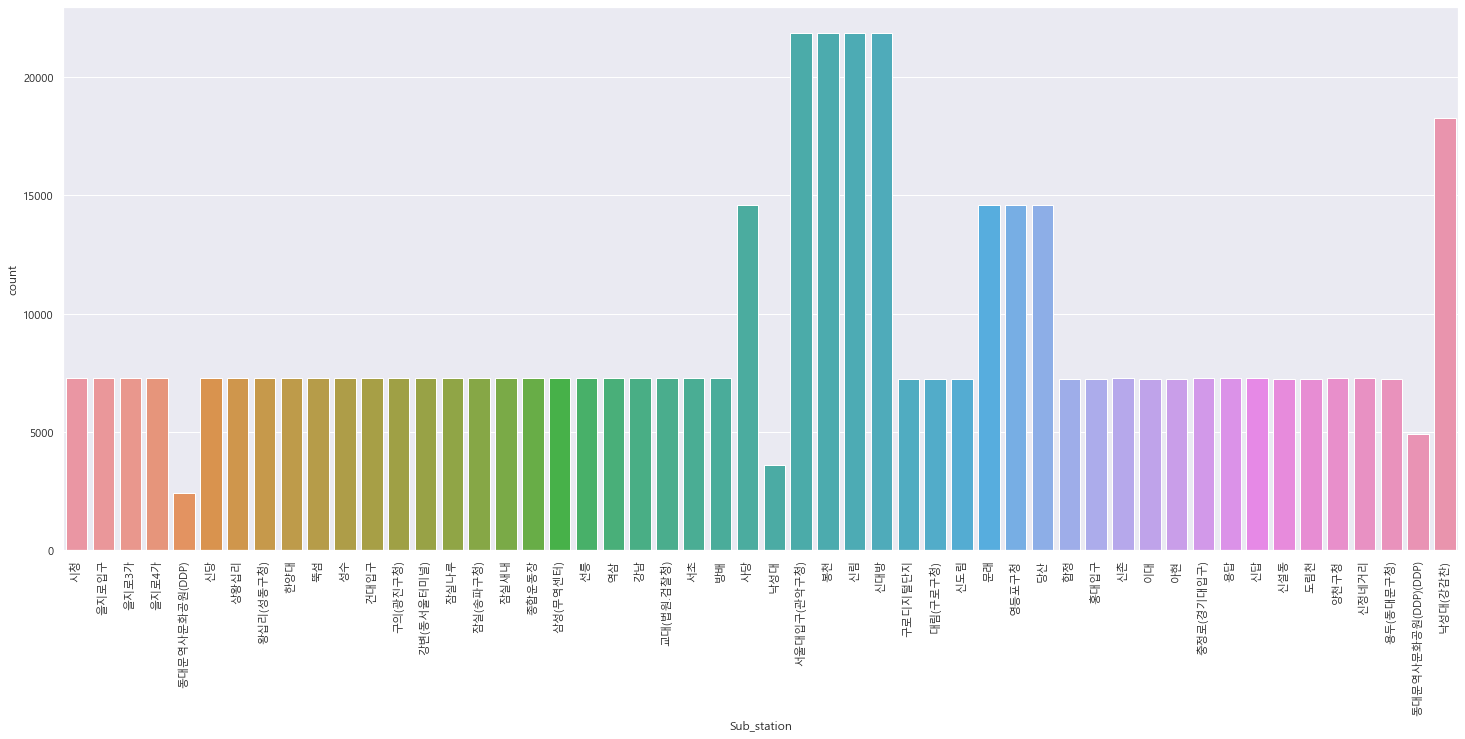

In [36]:
# 범주형 데이터 시각화 (수정 전)
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
sns.countplot(x='Sub_station', data=total_data)
plt.xticks(rotation=90)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

# 동대문역사문화공원(DDP)와 동대문역사문화공원(DDP)(DDP)는 합산되어야 한다. -> 재수정 필요
# 낙성대와 낙성대(강감찬)데이터는 합산되어야한다. -> 재수정 필요
# 사당, 서울대입구(관악구청), 봉천, 신림, 신대방, 문래, 영등포구청, 당산, 낙성대 값은 기상데이터와 합치는 과정에서 늘어난 것으로 보임 -> 재수정 필요


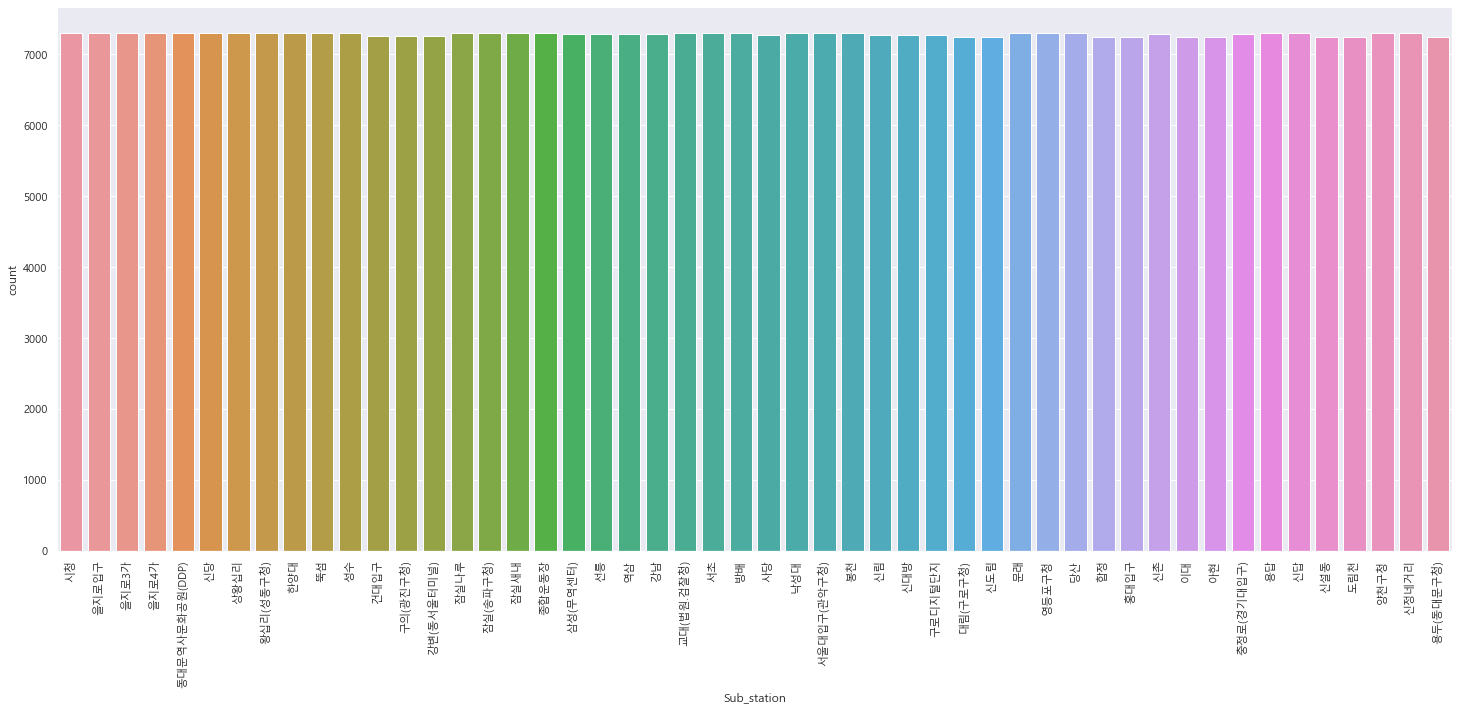

In [133]:
# 범주형 데이터 시각화 (수정 후)
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
sns.countplot(x='Sub_station', data=total_data)
plt.xticks(rotation=90)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

<AxesSubplot:xlabel='지하철 정거장', ylabel='지하철 승차인원'>

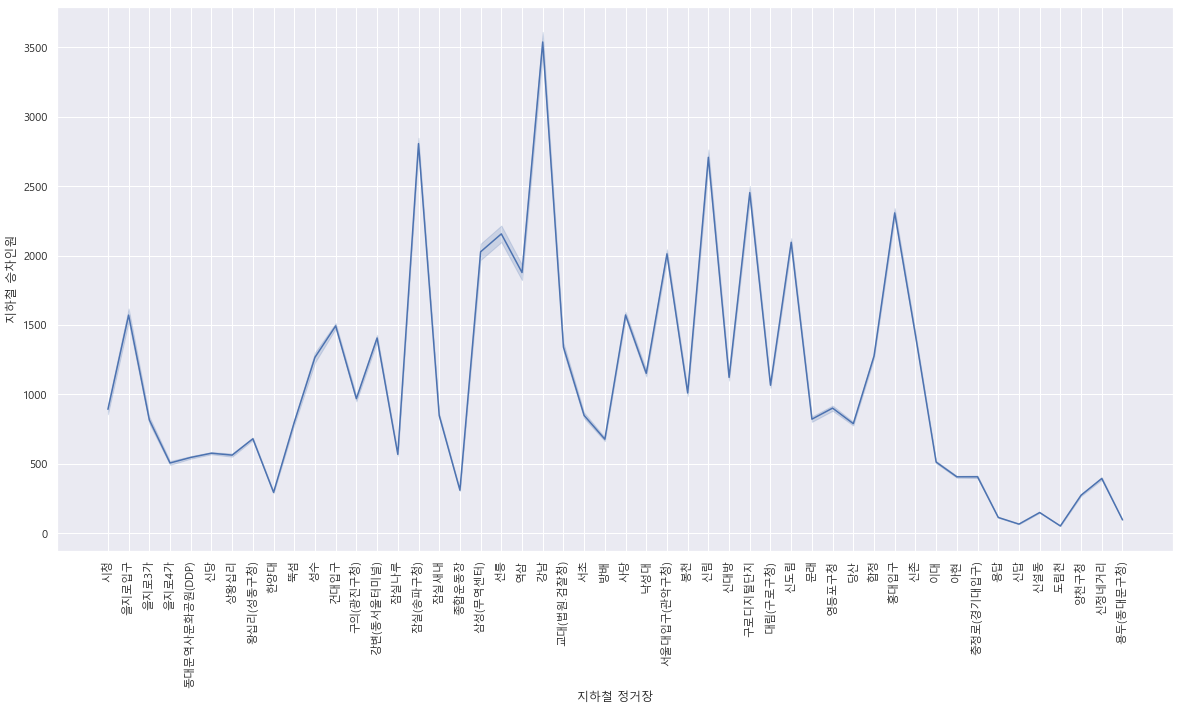

In [142]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
plt.xlabel('지하철 정거장')
plt.ylabel('지하철 승차인원')
sns.lineplot(total_data['Sub_station'], total_data['Passenger_num'], palette=['r','b','y','k'])

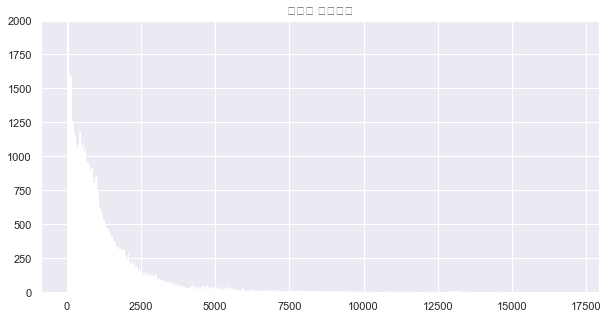

In [16]:
# 수치형 데이터 시각화
# 지하철 승차인원
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.hist(total_data['Passenger_num'], bins=5000)
ax.set_ylim(0, 2000)
ax.set_title('지하철 승차인원')
plt.show()

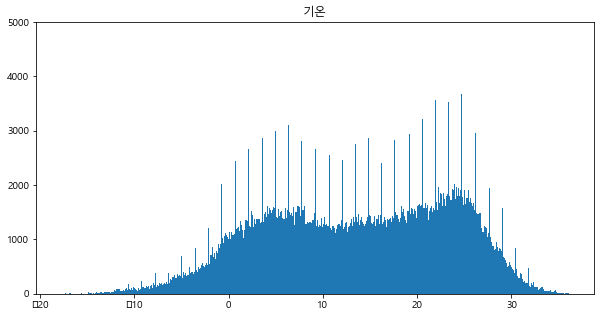

In [44]:
# 기온
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.hist(total_data['Temp'], bins=500)
ax.set_ylim(0, 5000)
ax.set_title('기온')
plt.show()

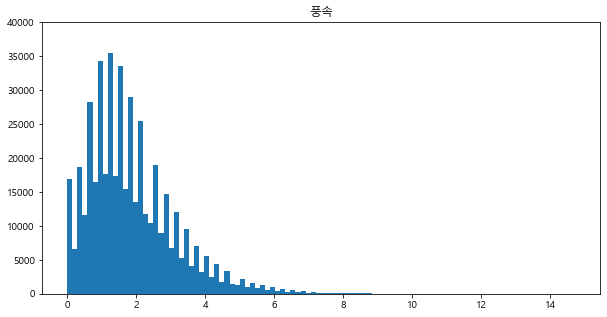

In [62]:
# 풍속
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.hist(total_data['Wind'], bins=100)
ax.set_ylim(0, 40000)
ax.set_title('풍속')
plt.show()

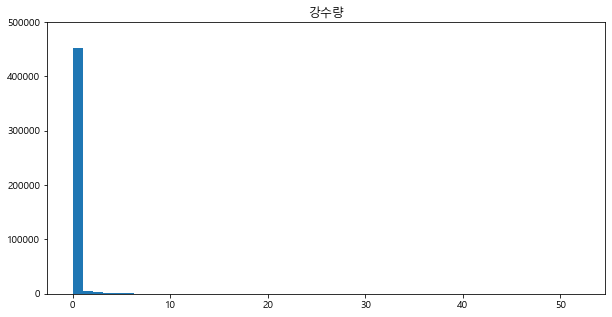

In [54]:
# 강수량
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.hist(total_data['Rain'], bins=50)
ax.set_ylim(0, 500000)
ax.set_title('강수량')
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'lineplot'

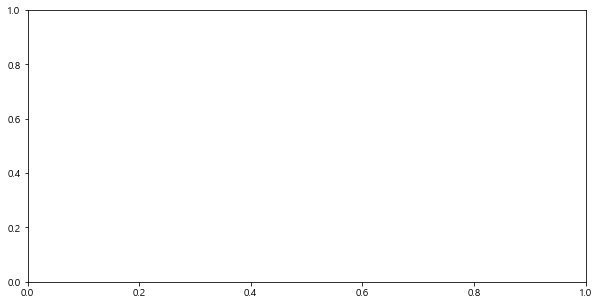

In [63]:
# 강수량
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.hist(total_data['Rain'], bins=50)
ax.set_ylim(0, 500000)
ax.set_title('강수량')
plt.show()

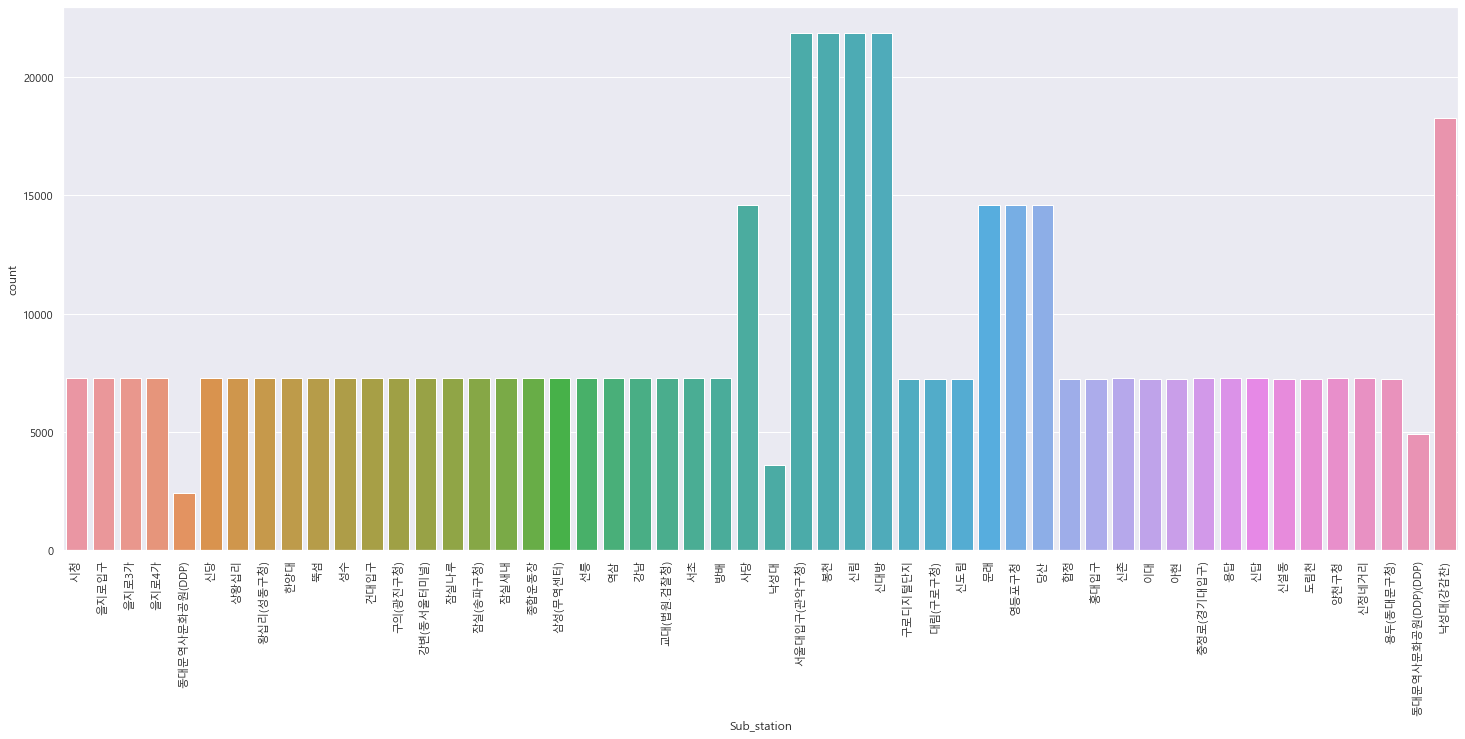

In [35]:
# 범주형 데이터 시각화
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
sns.countplot(x='Sub_station', data=total_data)
plt.xticks(rotation=90)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

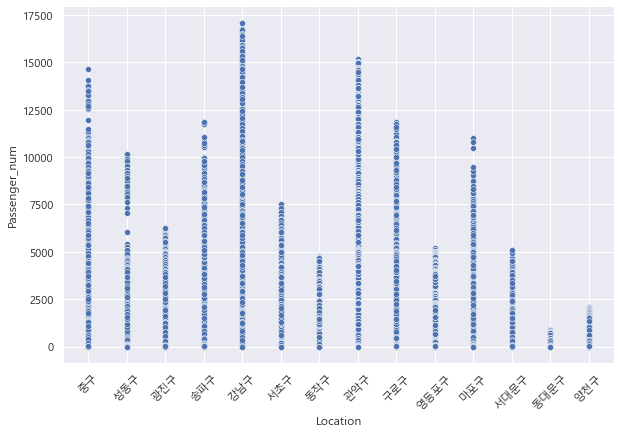

In [28]:
# 범주형 데이터 시각화
fig = sns.relplot(x='Location', y='Passenger_num', data=total_data)
fig.fig.set_size_inches(10, 6)
plt.xticks(rotation=45)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.countplot(x='Date', data=total_data)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

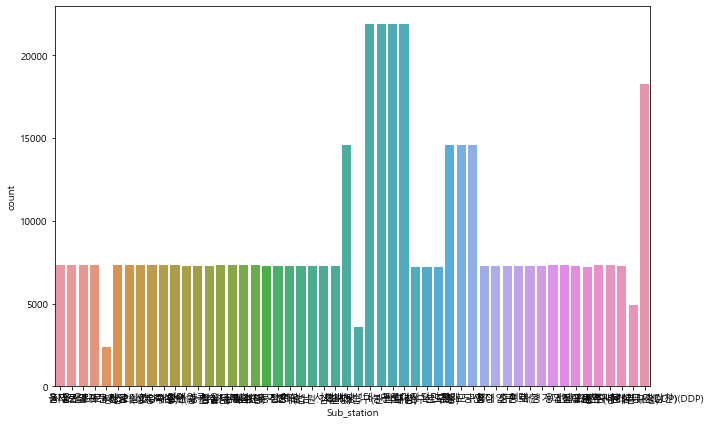

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.countplot(x='Sub_station', data=total_data)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.tight_layout()
plt.show()


In [ ]:
location = total_data[['위치']]
input_location = np.array(location)

sub_name = total_data[['역명']]
input_name = np.array(sub_name)

weather_temp = total_data[['기온(°C)']]
input_temp = np.array(weather_temp)

weather_wind = total_data[['풍속(m/s)']]
input_wind = np.array(weather_wind)

weather_rain = total_data[['강수량(mm)']]
input_rain = np.array(weather_rain)

total_data2 = total_data[['승차인원']]
passenger_num = np.array(total_data2)


# total_data1 = total_data[['위치','역명','기온(°C)','풍속(m/s)','강수량(mm)']]

In [ ]:
local_index = np.arange(len(input_location))

# plt.bar(local_index, passenger_num)      # 바 차트로 그려보기
# plt.xticks(local_index, input_location)  # 상관분석 히트맨 (씨본)
# plt.show()

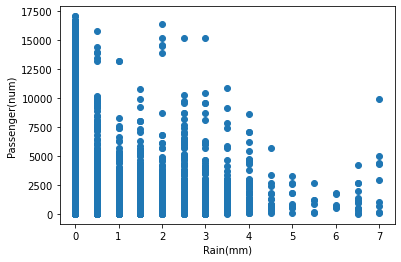

In [ ]:
plt.scatter(input_rain, passenger_num)
plt.ylabel('Passenger(num)')
plt.xlabel('Rain(mm)')
plt.show()

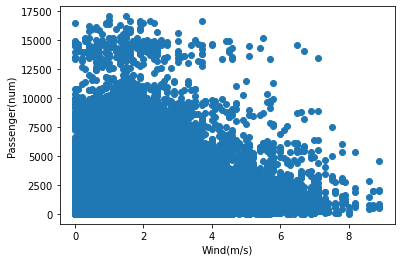

In [ ]:
plt.scatter(input_wind, passenger_num)
plt.ylabel('Passenger(num)')
plt.xlabel('Wind(m/s)')
plt.show()

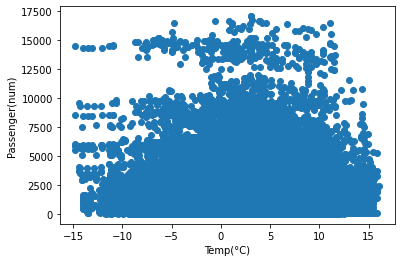

In [ ]:
plt.scatter(input_temp, passenger_num)
plt.ylabel('Passenger(num)')
plt.xlabel('Temp(°C)')
plt.show()